In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
"""
In order to run the code as is, you will need scipy, pandas and tqdm installed 
(although tqdm is only needed for the progress bar, and pandas is only for the autocorrelation function)
All of these can be installed (on linux) from the command interface using 'pip'
""" 

import scipy.io as sio
import numpy as np
import scipy
import scipy.stats
import matplotlib.pyplot as plt
from gibbsrank import gibbs_sample
from eprank import eprank, eprank_iter
from util import numpy_to_latex
import pandas as pd
from cw2 import sorted_barplot

In [3]:
import seaborn as sns

sns.set(rc={'figure.figsize':(14,8.27)})

We first need to load the data, stored in "tennis_data.mat". The data consists of an array, $W$ containing the names of each player, and an array, G, containing the results of all of the matches in the season. 

In [4]:
# set seed for reproducibility
np.random.seed(0)
# load data
data = sio.loadmat('tennis_data.mat')
# Array containing the names of each player
W = data['W']
# loop over array to format more nicely
for i, player in enumerate(W):
    W[i] = player[0]
# Array of size num_games x 2. The first entry in each row is the winner of game i, the second is the loser
G = data['G'] - 1 # Oh matlab
# Number of players
num_players = W.shape[0]
# Number of Games
N = G.shape[0]

# Gibbs sampling (This may take a minute)

In [5]:
# number of iterations
num_iters = 10000
# perform gibbs sampling, skill samples is an num_players x num_samples array
skill_samples = gibbs_sample(G, num_players, num_iters)#, random_nums)


100%|██████████| 10000/10000 [04:07<00:00, 40.48it/s]


##### Plot some of the sampled player skills vs. iteration

<Figure size 1008x576 with 0 Axes>

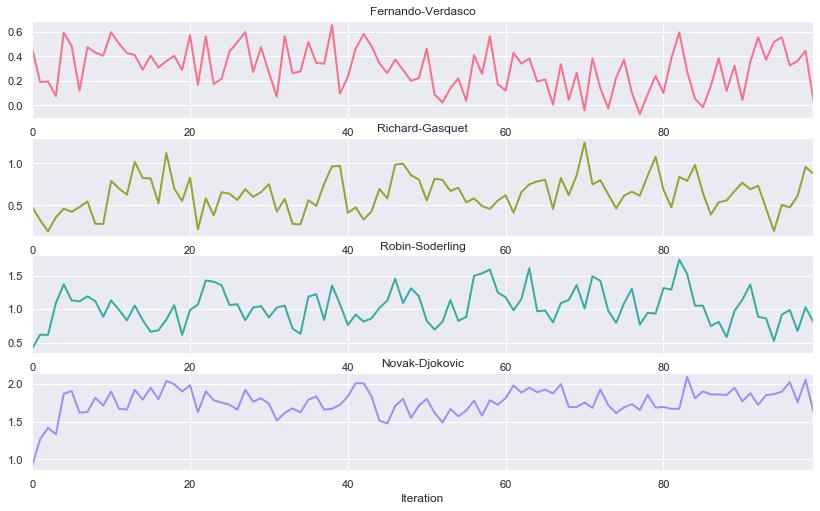

In [376]:
sns.set_palette('husl')
plt.figure(figsize=(14,8))
show_n_players=4
fig, axes = plt.subplots(show_n_players)
show_n_steps = 100
players = np.random.choice(np.arange(30), size=show_n_players, replace=False)
for i in range(show_n_players):
    axes[i].plot(np.arange(show_n_steps), skill_samples[players[i], :show_n_steps].T, label=W[i, 0],
                color=sns.color_palette('husl', 4)[i], linewidth=2.0);
    axes[i].set_xlim(0, show_n_steps - 1);
    axes[i].set_title(W[players[i],0]);
plt.xlabel('Iteration');
plt.savefig('plots/4_player_sample_trajectories_gibbs.eps', format='eps', dpi=200, bbox_inches='tight');

##### Plot autocorrelation

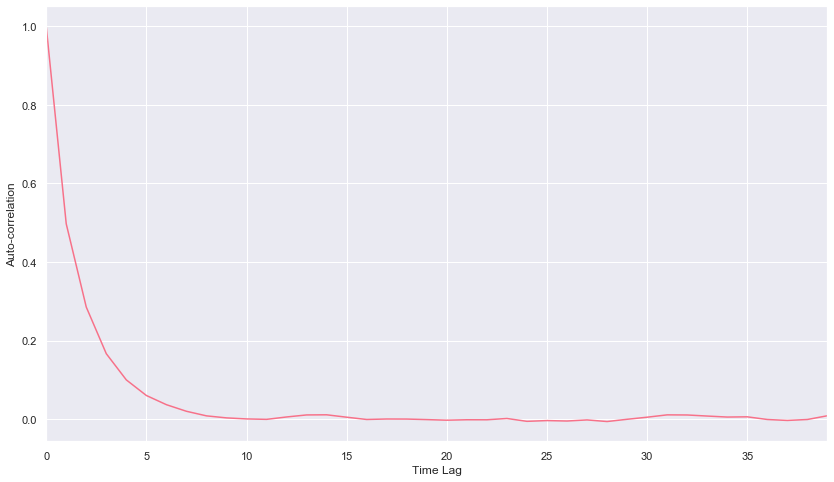

In [332]:
# Code for plotting the autocorrelation function for player p
plt.figure(figsize=(14,8))
show_n_steps = 40
p = 0
autocor = np.zeros(show_n_steps)
for i in range(show_n_steps):
    autocor[i]=pd.Series.autocorr(pd.Series(skill_samples[p,:]),lag=i)
plt.plot(autocor);
plt.xlabel('Time Lag');
plt.ylabel('Auto-correlation')
plt.xlim(0, 39)
plt.savefig('plots/single_autocorrelation.eps', format='eps', dpi=200)

##### Plot autocorrelation for all players

In [334]:
# Calculate autocorrelation for all players
show_n_steps = 20
autocor = np.zeros([W.shape[0], show_n_steps])
for player_id in range(W.shape[0]):
    for i in range(show_n_steps):
        autocor[player_id, i]=pd.Series.autocorr(pd.Series(skill_samples[player_id,:]),lag=i)

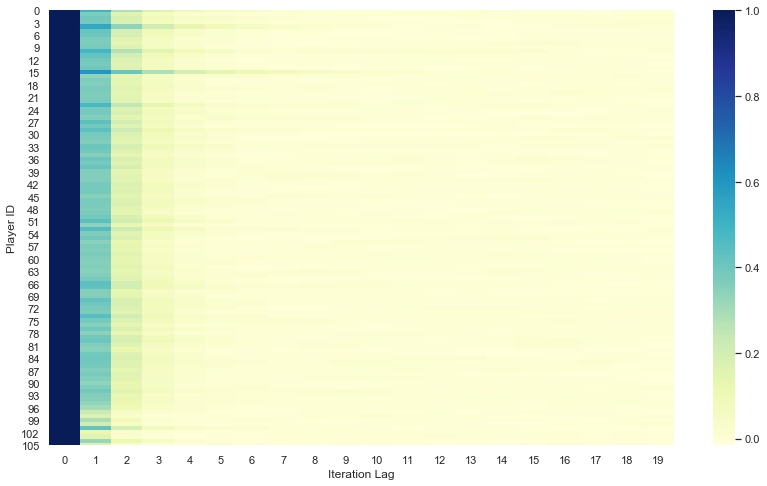

In [377]:
plt.figure(figsize=(14,8))
ax = sns.heatmap(autocor, vmax=1, cmap="YlGnBu")
ax.set_xlabel('Iteration Lag')
ax.set_ylabel('Player ID');
plt.savefig('plots/all_autocorrelations_heatmat.eps', format='eps', dpi=200, bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

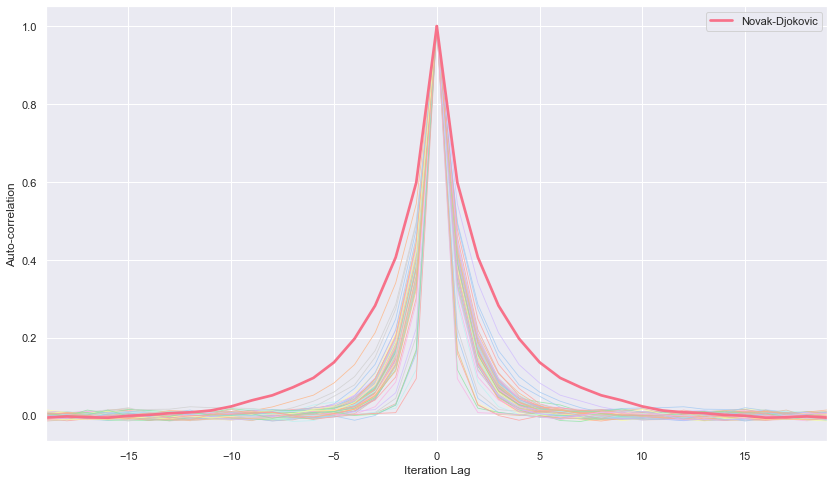

In [379]:
plt.figure(figsize=(14,8))
show_n_steps = 20
sns.set_palette('pastel')
plt.plot(np.arange(show_n_steps), autocor.T, alpha=0.8, linewidth=0.8);
plt.plot(np.arange(show_n_steps), autocor[15], alpha=1.0, linewidth=2.7, color=sns.color_palette('husl', 4)[0],
        label=W[15, 0]);
plt.plot(-np.arange(show_n_steps), autocor.T, alpha=0.8, linewidth=0.8);
plt.plot(-np.arange(show_n_steps), autocor[15], alpha=1.0, linewidth=2.7, color=sns.color_palette('husl', 4)[0]);
plt.xlabel('Iteration Lag')
plt.ylabel('Auto-correlation');
plt.xlim(1-show_n_steps, show_n_steps-1);
plt.legend()
plt.savefig('plots/all_autocorrelations_lines.eps', format='eps', dpi=200, bbox_inches='tight')

##### Burn-in

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


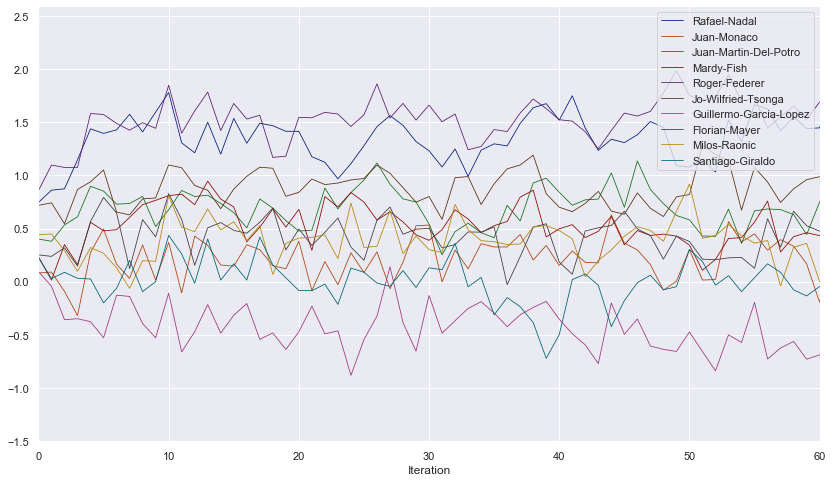

In [380]:
sns.set_palette('dark')
plt.figure(figsize=(14,8))
show_n_players = 10
for player_id in range(show_n_players):
    plt.plot(np.arange(num_iters), skill_samples.T[:, player_id], linewidth=0.8, label=W[player_id, 0])
plt.xlim(0, 60);
plt.legend(loc='upper right');
plt.xlabel('Iteration')
plt.savefig('plots/example_samples_can_see_burnin.eps', format='eps', dpi=200, bbox_inches='tight')

(0, 110)

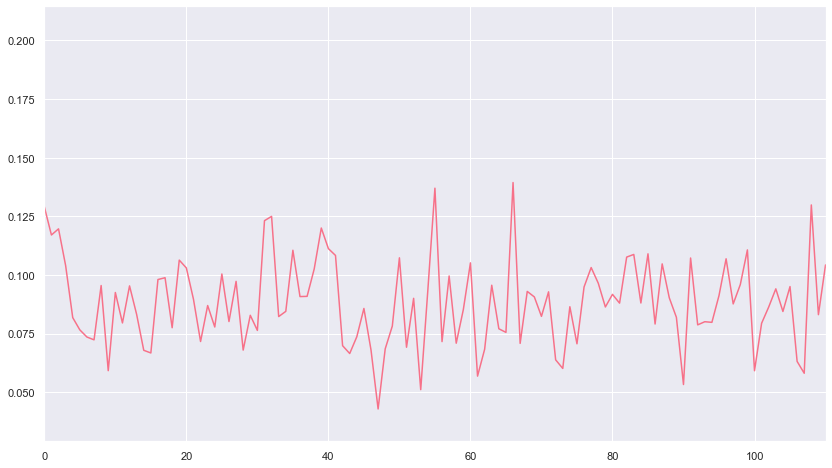

In [381]:
# Deviation from mean
sns.set_palette('husl')
plt.figure(figsize=(14,8))
deviation_from_mean = np.mean((skill_samples - skill_samples.mean(axis=1, keepdims=True))**2, axis=0)
plt.plot(np.arange(num_iters), deviation_from_mean);
plt.xlim(0, 110)

### Probability of observations given those skills

In [382]:
skills_player1 = skill_samples[G[:, 0]]
skills_player2 = skill_samples[G[:, 1]]

In [383]:
game_outcome_prob = scipy.stats.norm.cdf(skills_player1 - skills_player2)

In [384]:
sample_log_prob = np.sum(np.log(game_outcome_prob), axis=0)

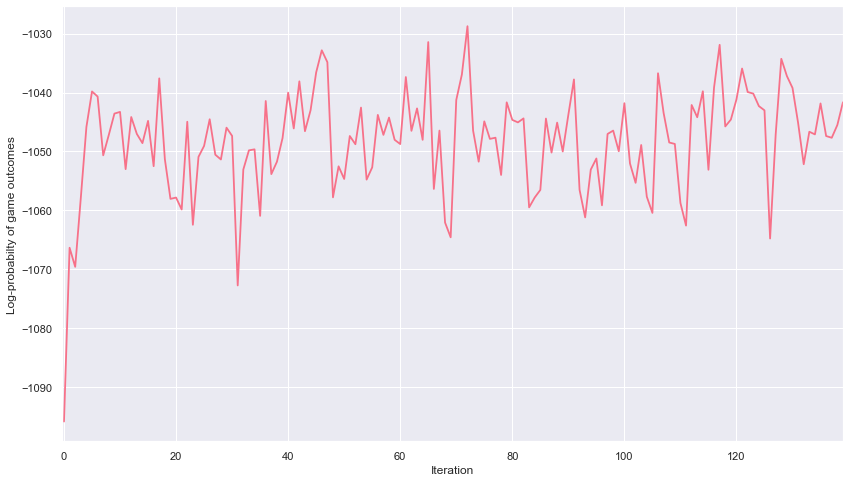

In [385]:
sns.set_palette('husl')
show_n_samples = 140
plt.figure(figsize=(14,8))
plt.plot(sample_log_prob[:show_n_samples], linewidth=1.8)
plt.xlim(-0.4, show_n_samples-1)
plt.ylabel('Log-probabilty of game outcomes')
plt.xlabel('Iteration')
plt.savefig('plots/log_probability_given_gibbs_samples.eps', format='eps', dpi=200, bbox_inches='tight')

#### Also include prior probability

In [386]:
sample_skill_prior_log_prob = np.sum(np.log(scipy.stats.norm.pdf(skill_samples)), axis=0)
total_sample_log_prob = sample_log_prob + sample_skill_prior_log_prob

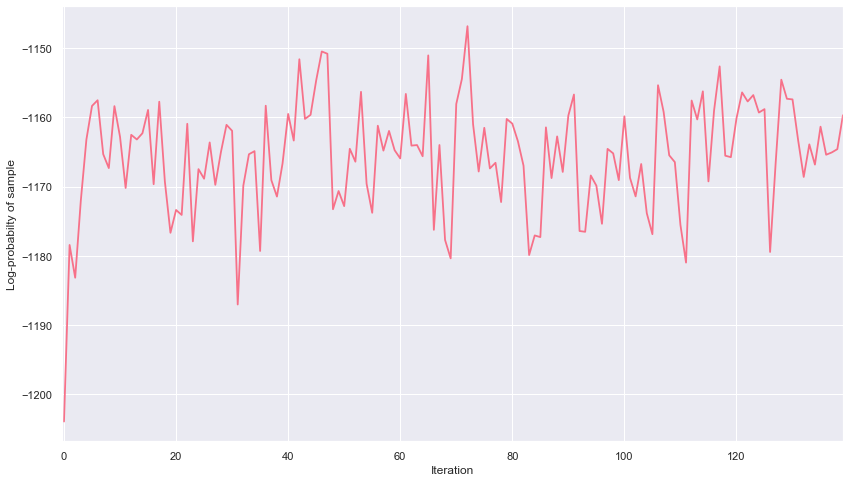

In [387]:
sns.set_palette('husl')
show_n_samples = 140
plt.figure(figsize=(14,8))
plt.plot(total_sample_log_prob[:show_n_samples], linewidth=1.8)
plt.xlim(-0.4, show_n_samples-1)
plt.ylabel('Log-probabilty of sample')
plt.xlabel('Iteration')
plt.savefig('plots/total_log_probability_given_gibbs_samples.eps', format='eps', dpi=200, bbox_inches='tight')

# EP ranking

In [32]:
num_iters = 400
# run message passing algorithm, returns mean and precision for each player
mean_player_skills, precision_player_skills = eprank(G, num_players, num_iters)

In [33]:
mean_skills_list, precision_skills_list = [], []
for mean, precision in eprank_iter(G, N, num_iters):
    mean_skills_list.append(mean)
    precision_skills_list.append(precision)

In [34]:
mean_skills = np.stack(mean_skills_list, axis=0)
precision_skills = np.stack(precision_skills_list, axis=0)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

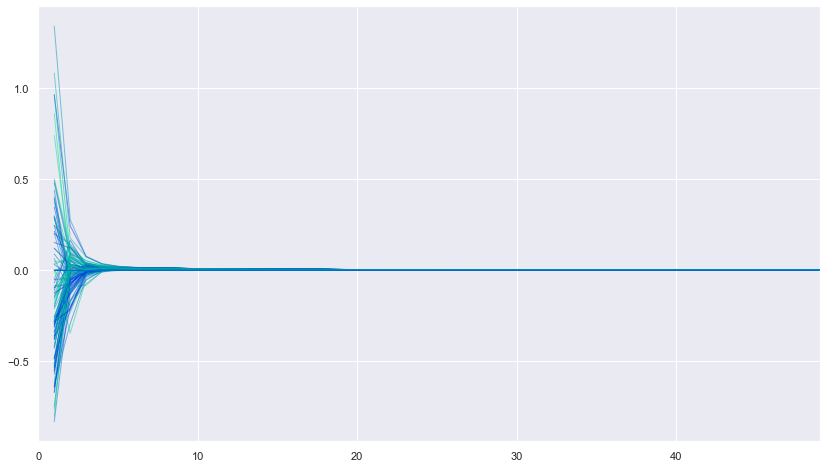

In [35]:
# Changes in means
sns.set_palette('winter')
show_n_iter=50
plt.figure(figsize=(14,8))
plt.plot(np.arange(1, show_n_iter + 1), (mean_skills[1:] - mean_skills[:-1])[:show_n_iter], alpha=0.5, linewidth=1.0);
plt.xlim(0,show_n_iter-1);
plt.savefig('plots/change_in_mean_normal.eps', format='eps', dpi=200, bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


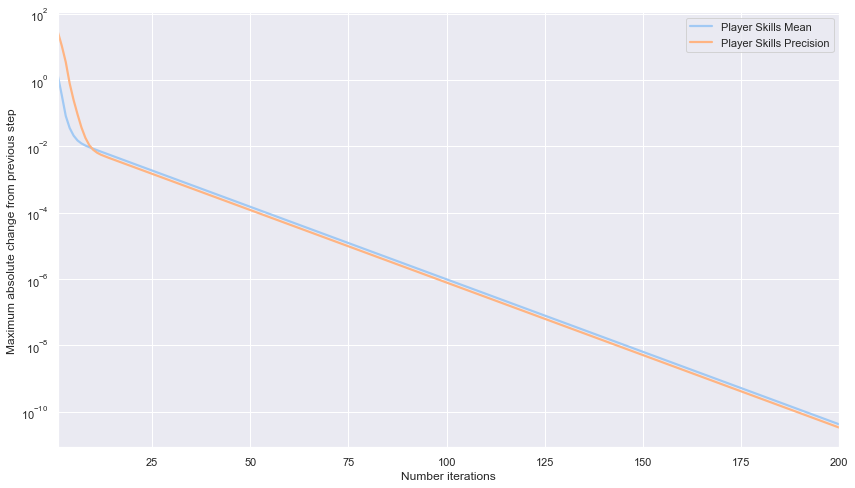

In [36]:
# Maximum change in mean and precision
sns.set_palette('pastel')
show_n_iter=200
plt.figure(figsize=(14,8))

max_mean_change = np.max(np.abs(mean_skills[1:] - mean_skills[:-1]), axis=1)
max_prec_change = np.max(np.abs(precision_skills[1:] - precision_skills[:-1]), axis=1)

plt.plot(np.arange(1, show_n_iter + 1), max_mean_change[:show_n_iter], label='Player Skills Mean', linewidth=2.2)
plt.plot(np.arange(1, show_n_iter + 1), max_prec_change[:show_n_iter], label='Player Skills Precision', linewidth=2.2)
plt.yscale('log')
plt.xlim(1, show_n_iter)
plt.xlabel('Number iterations')
plt.ylabel('Maximum absolute change from previous step')
plt.legend();
plt.savefig('plots/max_change_in_mean_and_precision.eps', format='eps', dpi=200, bbox_inches='tight')

In [ ]:
# KL-divergence would be nice as well.

### Compare player skills (Part C)

In [392]:
# Get top 4 players (by ATP) player IDs
top_4_atp = ['Novak-Djokovic', 'Rafael-Nadal', 'Roger-Federer', 'Andy-Murray']
top_4_atp_ids = []
for name in top_4_atp:
    top_4_atp_ids.append(int(np.argwhere(W[:, 0] == name)))
print(top_4_atp_ids)
top_4_atp_ids = np.array(top_4_atp_ids)

[15, 0, 4, 10]


In [393]:
top_4_means = mean_player_skills[top_4_atp_ids]
top_4_vars = precision_player_skills[top_4_atp_ids]**(-1)

In [394]:
mean_differences = top_4_means[:, None] -  top_4_means[None,:]
vars_sums = top_4_vars[:, None] +  top_4_vars[None,:]

##### Probability they have better skill

In [395]:
prob_has_better_skill = 1.0 - scipy.stats.norm.cdf(0, mean_differences, vars_sums**0.5)
print(prob_has_better_skill)

[[0.5        0.93982214 0.90888525 0.9853215 ]
 [0.06017786 0.5        0.42717033 0.76651864]
 [0.09111475 0.57282967 0.5        0.81083534]
 [0.0146785  0.23348136 0.18916466 0.5       ]]


In [396]:
print(numpy_to_latex(prob_has_better_skill))

\num{0.5} & \num{0.9398221414999961} & \num{0.9088852474975083} & \num{0.9853215026660052} & \\ 
\num{0.0601778585000039} & \num{0.5} & \num{0.4271703297941385} & \num{0.7665186387474068} & \\ 
\num{0.09111475250249168} & \num{0.5728296702058615} & \num{0.5} & \num{0.8108353381323881} & \\ 
\num{0.014678497333994844} & \num{0.23348136125259322} & \num{0.18916466186761194} & \num{0.5} & \\ 



##### Probability they win

In [397]:
prob_win = 1.0 - scipy.stats.norm.cdf(0, mean_differences, (vars_sums + 1.0)**0.5)
print(prob_win)

[[0.5        0.65536701 0.63802696 0.71982573]
 [0.34463299 0.5        0.48164814 0.57311   ]
 [0.36197304 0.51835186 0.5        0.59087907]
 [0.28017427 0.42689    0.40912093 0.5       ]]


In [398]:
print(numpy_to_latex(prob_win))

\num{0.5} & \num{0.6553670082944008} & \num{0.6380269642076749} & \num{0.7198257315287633} & \\ 
\num{0.34463299170559925} & \num{0.5} & \num{0.48164814236463827} & \num{0.5731100020692282} & \\ 
\num{0.3619730357923251} & \num{0.5183518576353617} & \num{0.5} & \num{0.5908790668723507} & \\ 
\num{0.2801742684712367} & \num{0.42688999793077176} & \num{0.4091209331276493} & \num{0.5} & \\ 



## Compare skills using Gibbs Sampling (Part D)

In [8]:
skill_samples_burned_in = skill_samples[:, 100:]
print(skill_samples_burned_in.shape)

(107, 9900)


In [402]:
skill_samples_df = pd.DataFrame({W[i, 0]: skill_samples_burned_in[i] for i in range(W.shape[0])})

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

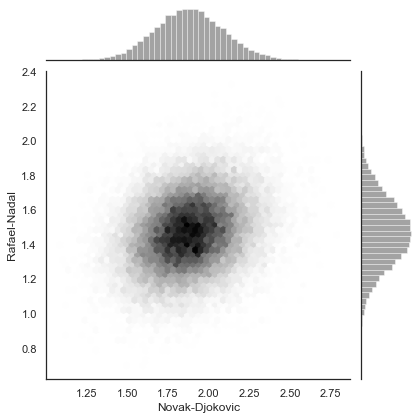

In [406]:
with sns.axes_style("white"):
    sns.jointplot(x='Novak-Djokovic', y='Rafael-Nadal', data=skill_samples_df, kind="hex", color="k");
plt.savefig('plots/djokovic-vs-nadal-gibbs-samples.eps', format='eps', dpi=200, bbox_inches='tight')

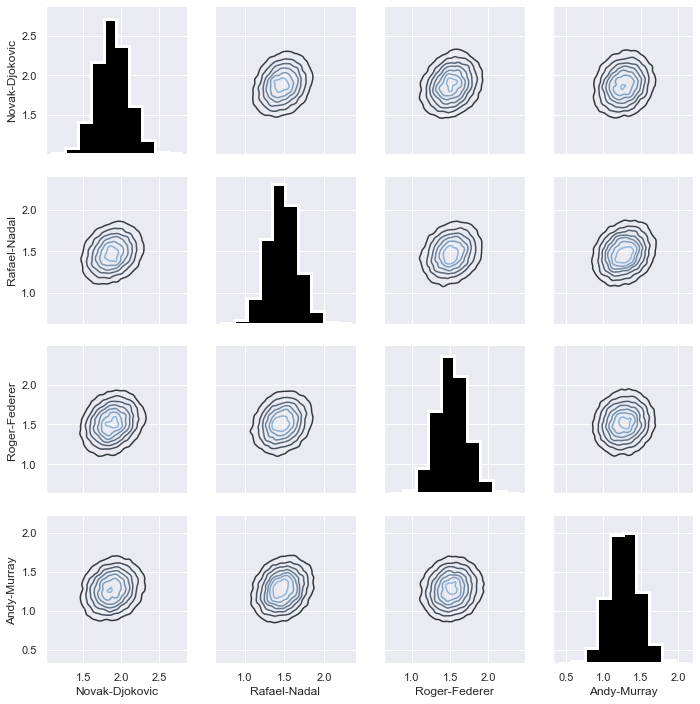

In [420]:
with sns.axes_style("darkgrid"):
    g = sns.PairGrid(skill_samples_df[top_4_atp], palette='pastel')
    g.map_diag(plt.hist, linewidth=3, histtype='stepfilled', color='black')
    g.map_offdiag(sns.kdeplot, n_levels=7);
#     g.map_offdiag(plt.scatter, marker='+', alpha=0.5, color=sns.color_palette('pastel', 2)[0]);
plt.savefig('plots/pair-grid-top4-atp-gibbs-samples.eps', format='eps', dpi=200, bbox_inches='tight')

#### Calculate marginal Gaussians (Djokovic vs Nadal)

In [411]:
marginal_skill_means = np.mean(skill_samples_burned_in[[15, 0], :], axis=1)
marginal_skill_vars = np.var(skill_samples_burned_in[[15, 0], :], axis=1)
print(marginal_skill_means, marginal_skill_vars)

[1.8824498  1.47395547] [0.04539517 0.03712036]


In [412]:
# Probability Djokovic's skill is higher
prob_skill_higher = 1.0 - scipy.stats.norm.cdf(0, marginal_skill_means[0] - marginal_skill_means[1], (marginal_skill_vars.sum())**0.5)
print(prob_skill_higher)

0.9224957096614698


#### Calculate joint Gaussian (Djokovic vs Nadal)

In [421]:
mean = np.mean(skill_samples_burned_in[[15, 0], :], axis=1)
cov = np.cov(skill_samples_burned_in[[15, 0], :], rowvar=1)
print(cov)

[[0.04539631 0.00969834]
 [0.00969834 0.03712129]]


In [414]:
mc_joint_gaussian_samples = np.random.multivariate_normal(mean, cov, size=100000)
prob_skill_higher = np.mean(mc_joint_gaussian_samples[:, 0] > mc_joint_gaussian_samples[:, 1])
print(prob_skill_higher)

0.94801


#### Calculate directly from Gibbs samples (Djokovic vs Nadal)

In [422]:
prob_skill_higher = np.mean(skill_samples_burned_in[15, :] > skill_samples_burned_in[0, :])
print(prob_skill_higher)

0.9489473684210527


#### Calculate from Gibbs for 4 top players

In [423]:
prob_higher_skill = np.zeros([4, 4])
for i in range(4):
    for j in range(4):
        player1 = top_4_atp_ids[i]
        player2 = top_4_atp_ids[j]
        prob_higher_skill[i, j] = np.mean(skill_samples_burned_in[player1, :] > skill_samples_burned_in[player2, :])
print(prob_higher_skill)

[[0.         0.94894737 0.91719298 0.98814536]
 [0.05105263 0.         0.42526316 0.78483709]
 [0.08280702 0.57473684 0.         0.81293233]
 [0.01185464 0.21516291 0.18706767 0.        ]]


In [424]:
print(numpy_to_latex(prob_higher_skill))

\num{0.0} & \num{0.9489473684210527} & \num{0.9171929824561403} & \num{0.9881453634085213} & \\ 
\num{0.05105263157894737} & \num{0.0} & \num{0.42526315789473684} & \num{0.7848370927318296} & \\ 
\num{0.08280701754385965} & \num{0.5747368421052632} & \num{0.0} & \num{0.8129323308270676} & \\ 
\num{0.011854636591478696} & \num{0.21516290726817042} & \num{0.18706766917293233} & \num{0.0} & \\ 



## Player rankings

In [45]:
skill_mean_gibbs = np.mean(skill_samples_burned_in, axis=1)
skill_std_gibbs = np.std(skill_samples_burned_in, axis=1)
skill_mean_mp = mean_player_skills
skill_std_mp = (1 / precision_player_skills)**0.5

In [46]:
frac_games_won = np.zeros(num_players)
for player_id in range(num_players):
    frac_games_won[player_id] = np.sum(G[:, 0] == player_id) / np.sum(G == player_id)

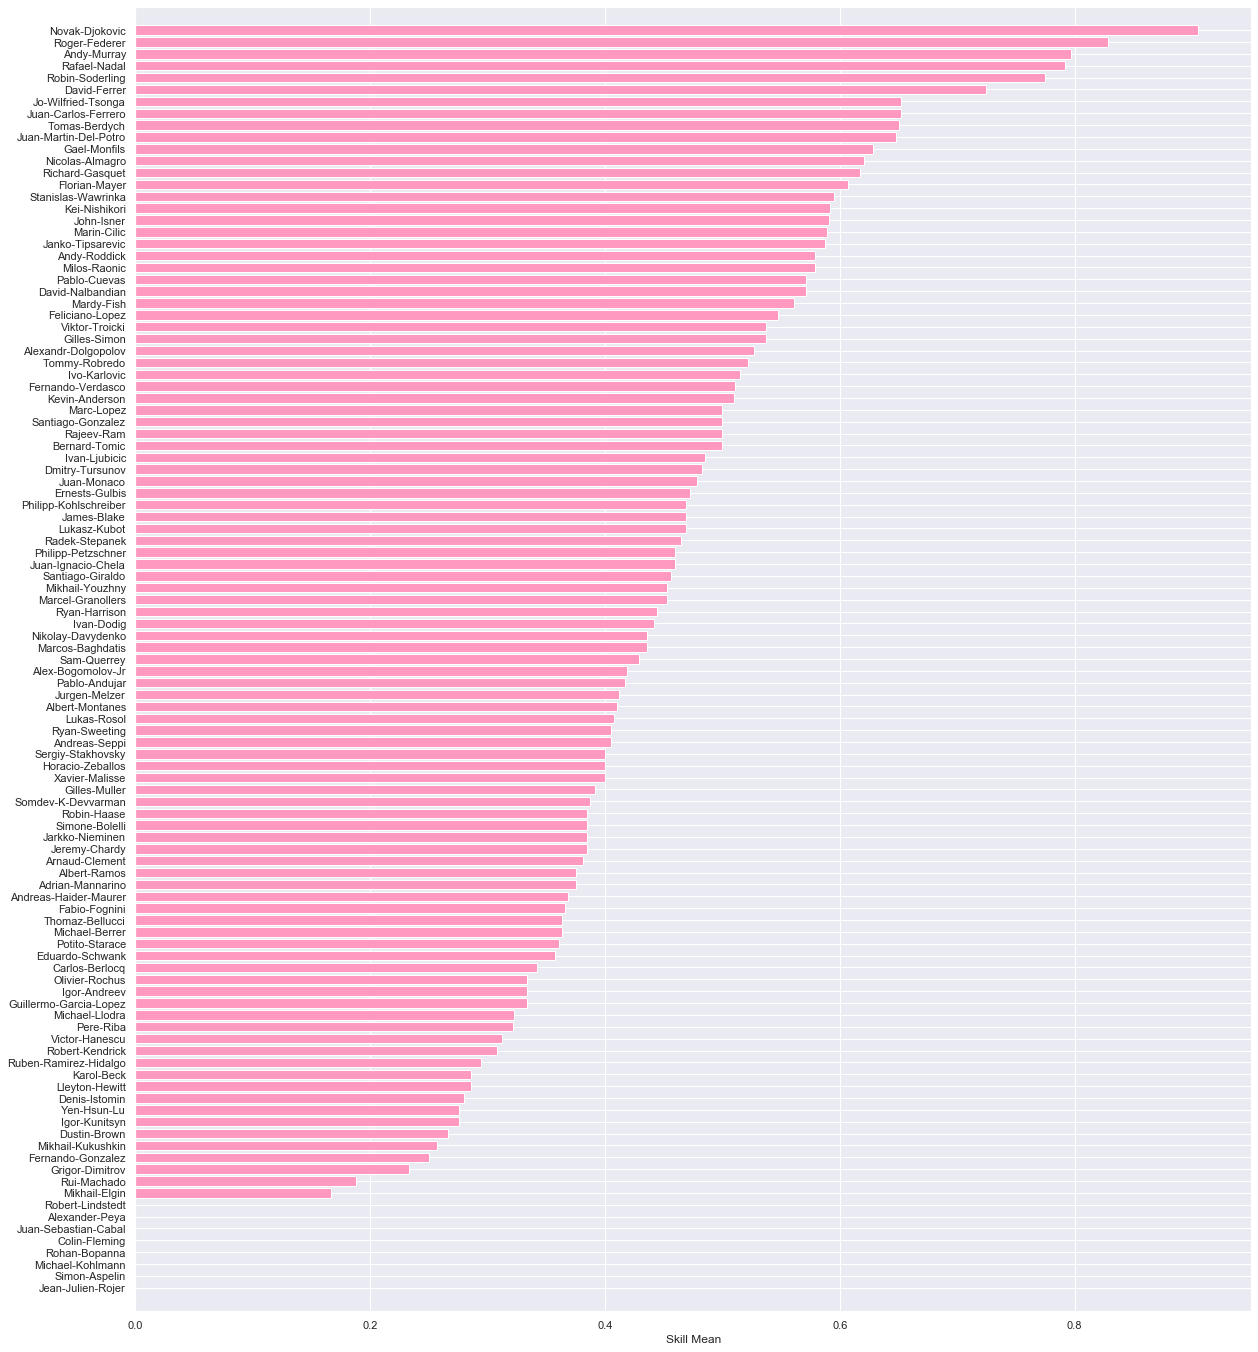

In [47]:
fig = sorted_barplot(frac_games_won, W)
fig.savefig('plots/empirical-ranking.eps', format='eps', dpi=200, bbox_inches='tight')

### Expected probability of winning

##### Gibbs

In [48]:
skill_differences = skill_samples_burned_in[:, None, :] - skill_samples_burned_in[None, :, :]
skill_differences.shape

(107, 107, 9900)

In [49]:
prob_win_gibbs = np.mean((skill_differences + np.random.randn(skill_differences.shape[2])) > 0, axis=2)
avg_prob_win_gibbs = np.zeros(num_players)
for i in range(num_players):
    for j in range(num_players):
        if i != j:
            avg_prob_win_gibbs[i] += prob_win_gibbs[i, j]
avg_prob_win_gibbs /= num_players -1
print(avg_prob_win_gibbs)

[0.89857919 0.5818725  0.74321708 0.68239375 0.90561368 0.77085287
 0.3835344  0.66559653 0.6217267  0.48322851 0.86542024 0.71021727
 0.63304269 0.47498475 0.68669621 0.94777778 0.59228893 0.52581094
 0.41478369 0.58147703 0.64217076 0.44334858 0.59807414 0.8086802
 0.65501048 0.65970078 0.5142996  0.40931199 0.68255765 0.81046407
 0.45137221 0.62931485 0.5777206  0.75375929 0.4348866  0.58476272
 0.36287974 0.56177149 0.33990852 0.50174671 0.53129598 0.60878121
 0.6608948  0.40562702 0.66925005 0.53020011 0.6563017  0.66302935
 0.42606918 0.42525062 0.38453021 0.27710501 0.50733753 0.32712312
 0.4472489  0.36477702 0.40524967 0.57740804 0.32715075 0.42802363
 0.42980179 0.52028397 0.56134458 0.46371355 0.52211931 0.50907471
 0.31302935 0.32064132 0.5344454  0.53223366 0.37832762 0.50196684
 0.3786478  0.40258243 0.2340728  0.45746045 0.47124833 0.36330665
 0.47657233 0.60677339 0.33146941 0.46524109 0.34339813 0.41160663
 0.32925958 0.30549171 0.47974176 0.32571469 0.27806747 0.43634

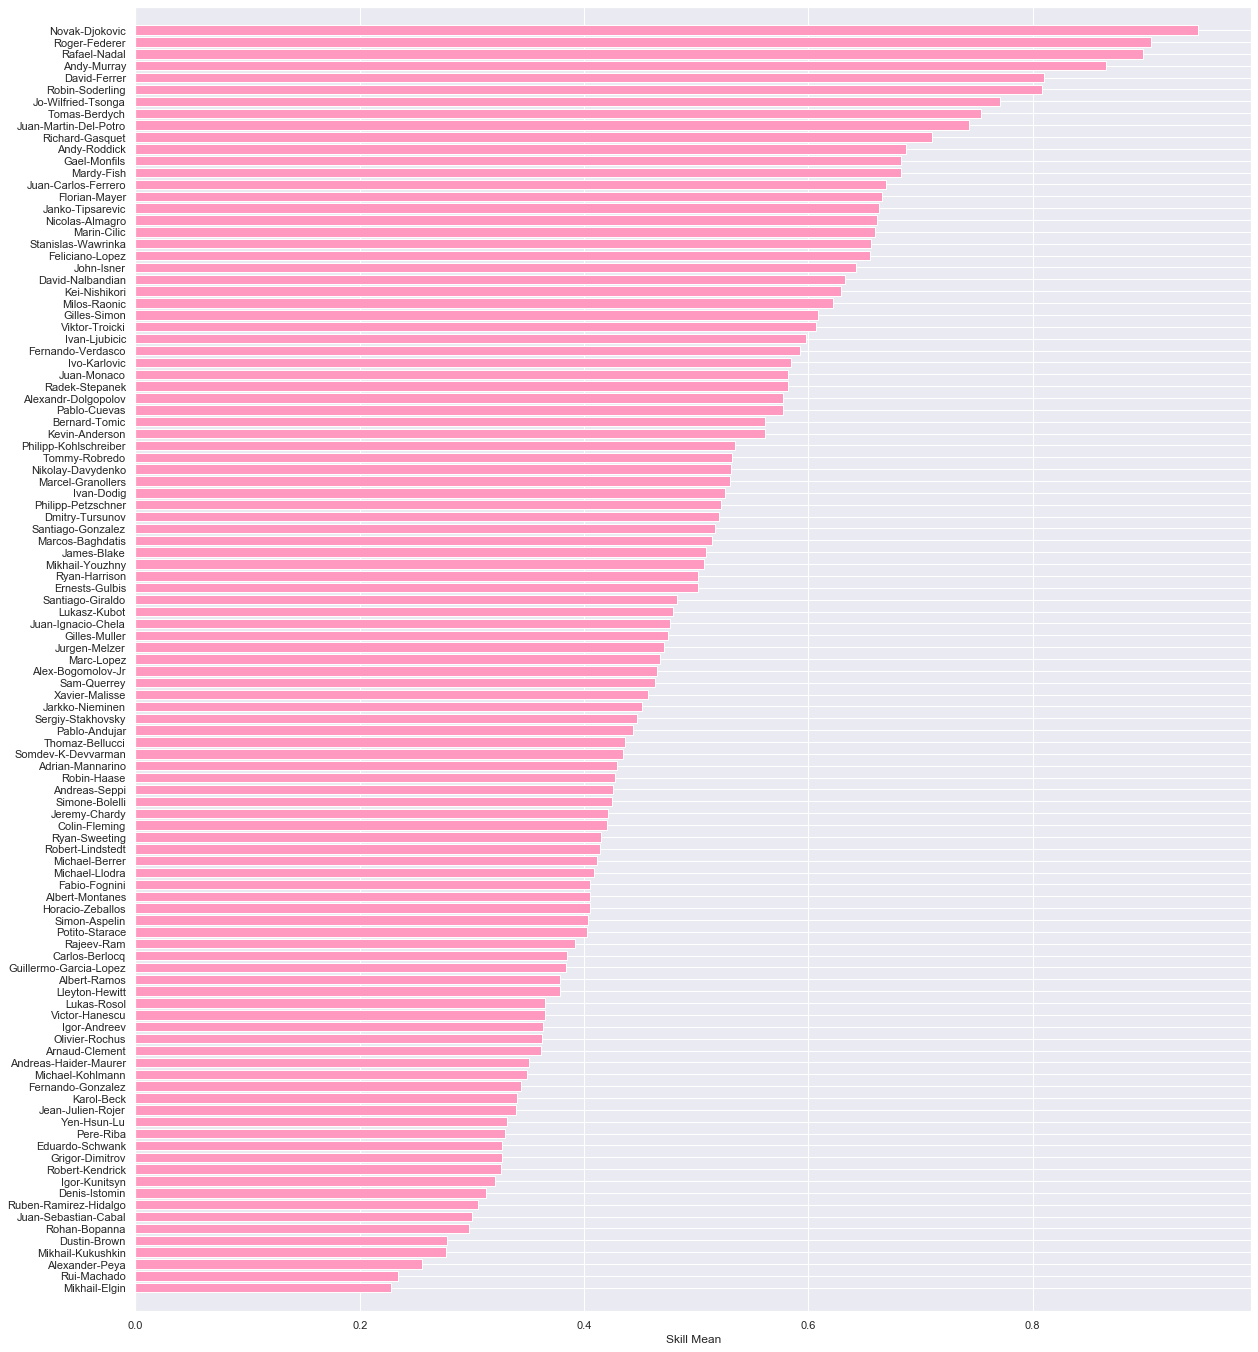

In [50]:
fig = sorted_barplot(avg_prob_win_gibbs, W)
fig.savefig('plots/gibbs-outcome-ranking.eps', format='eps', dpi=200, bbox_inches='tight')

### MP

In [51]:
mean_differences = skill_mean_mp[:, None] -  skill_mean_mp[None,:]
vars_sums = skill_std_mp[:, None]**2 +  skill_std_mp[None,:]**2

In [52]:
prob_win_mp = 1.0 - scipy.stats.norm.cdf(0, mean_differences, (vars_sums + 1.0)**0.5)
print(prob_win_mp)

[[0.5        0.88314903 0.75589844 ... 0.98418695 0.92603128 0.95487029]
 [0.11685097 0.5        0.30909791 ... 0.85035262 0.66247779 0.74502558]
 [0.24410156 0.69090209 0.5        ... 0.93365439 0.80222604 0.86269825]
 ...
 [0.01581305 0.14964738 0.06634561 ... 0.5        0.30368765 0.38487647]
 [0.07396872 0.33752221 0.19777396 ... 0.69631235 0.5        0.58358037]
 [0.04512971 0.25497442 0.13730175 ... 0.61512353 0.41641963 0.5       ]]


In [53]:
avg_prob_win_mp = np.zeros(num_players)
for i in range(num_players):
    for j in range(num_players):
        if i != j:
            avg_prob_win_mp[i] += prob_win_mp[i, j]
avg_prob_win_mp /= num_players -1
print(avg_prob_win_mp)

[0.89860788 0.58579133 0.74552942 0.68576537 0.90530744 0.77246998
 0.38595895 0.66951315 0.62527112 0.48591834 0.86605869 0.71258516
 0.63687476 0.47956099 0.68828946 0.94813179 0.59726909 0.52766202
 0.41703217 0.58408766 0.64566962 0.4463539  0.60092638 0.80983627
 0.65797331 0.66365221 0.5189551  0.41315059 0.68508063 0.81033632
 0.45432076 0.63229473 0.58207181 0.75761608 0.43746972 0.58978992
 0.36594781 0.56431516 0.34327498 0.50297306 0.53543329 0.61410347
 0.6618345  0.40676053 0.67194064 0.53447567 0.66017105 0.66617144
 0.43051444 0.42869699 0.38314397 0.27852534 0.51301058 0.32920645
 0.45147636 0.36842837 0.407486   0.57881848 0.32989632 0.43134947
 0.43194815 0.52395262 0.56418129 0.46836503 0.52640162 0.51319984
 0.31543281 0.3253601  0.53860694 0.53333041 0.37782074 0.50507802
 0.38160886 0.40676918 0.23413209 0.46323043 0.47509645 0.36745021
 0.48028659 0.61148457 0.33493799 0.47003298 0.34598026 0.41670256
 0.33394665 0.30780766 0.48366442 0.32752039 0.27899454 0.4410

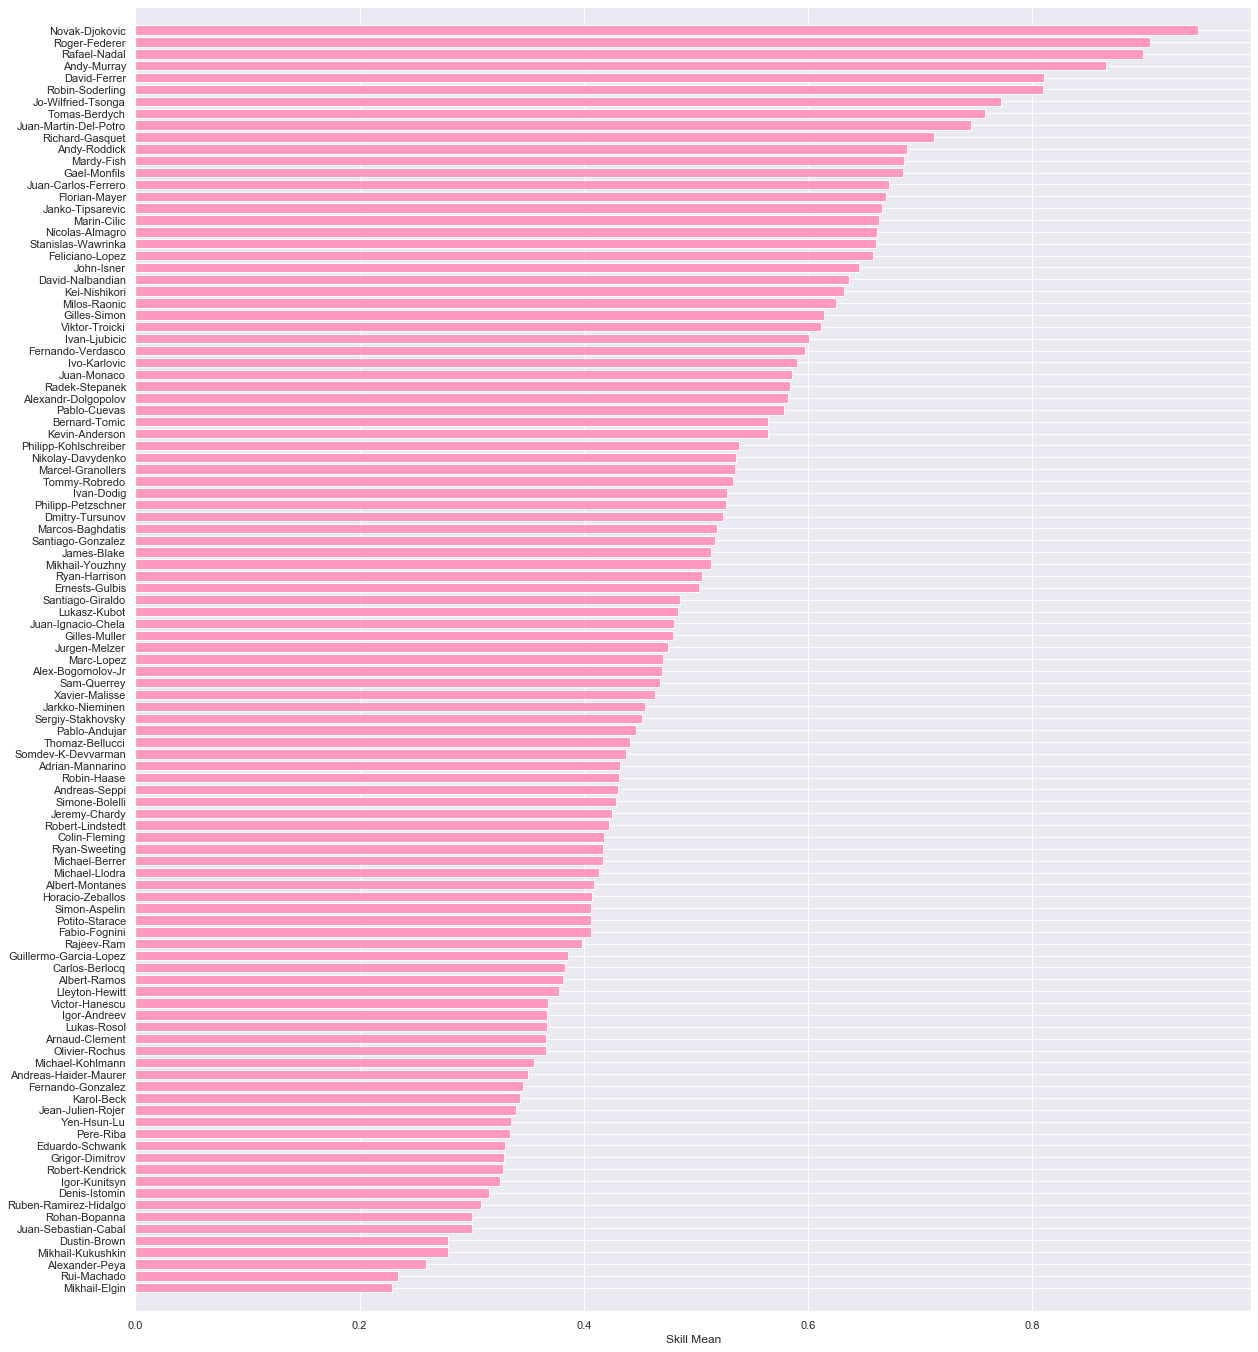

In [54]:
fig = sorted_barplot(avg_prob_win_mp, W)
fig.savefig('plots/mp-outcome-ranking.eps', format='eps', dpi=200, bbox_inches='tight')

### Expected skill

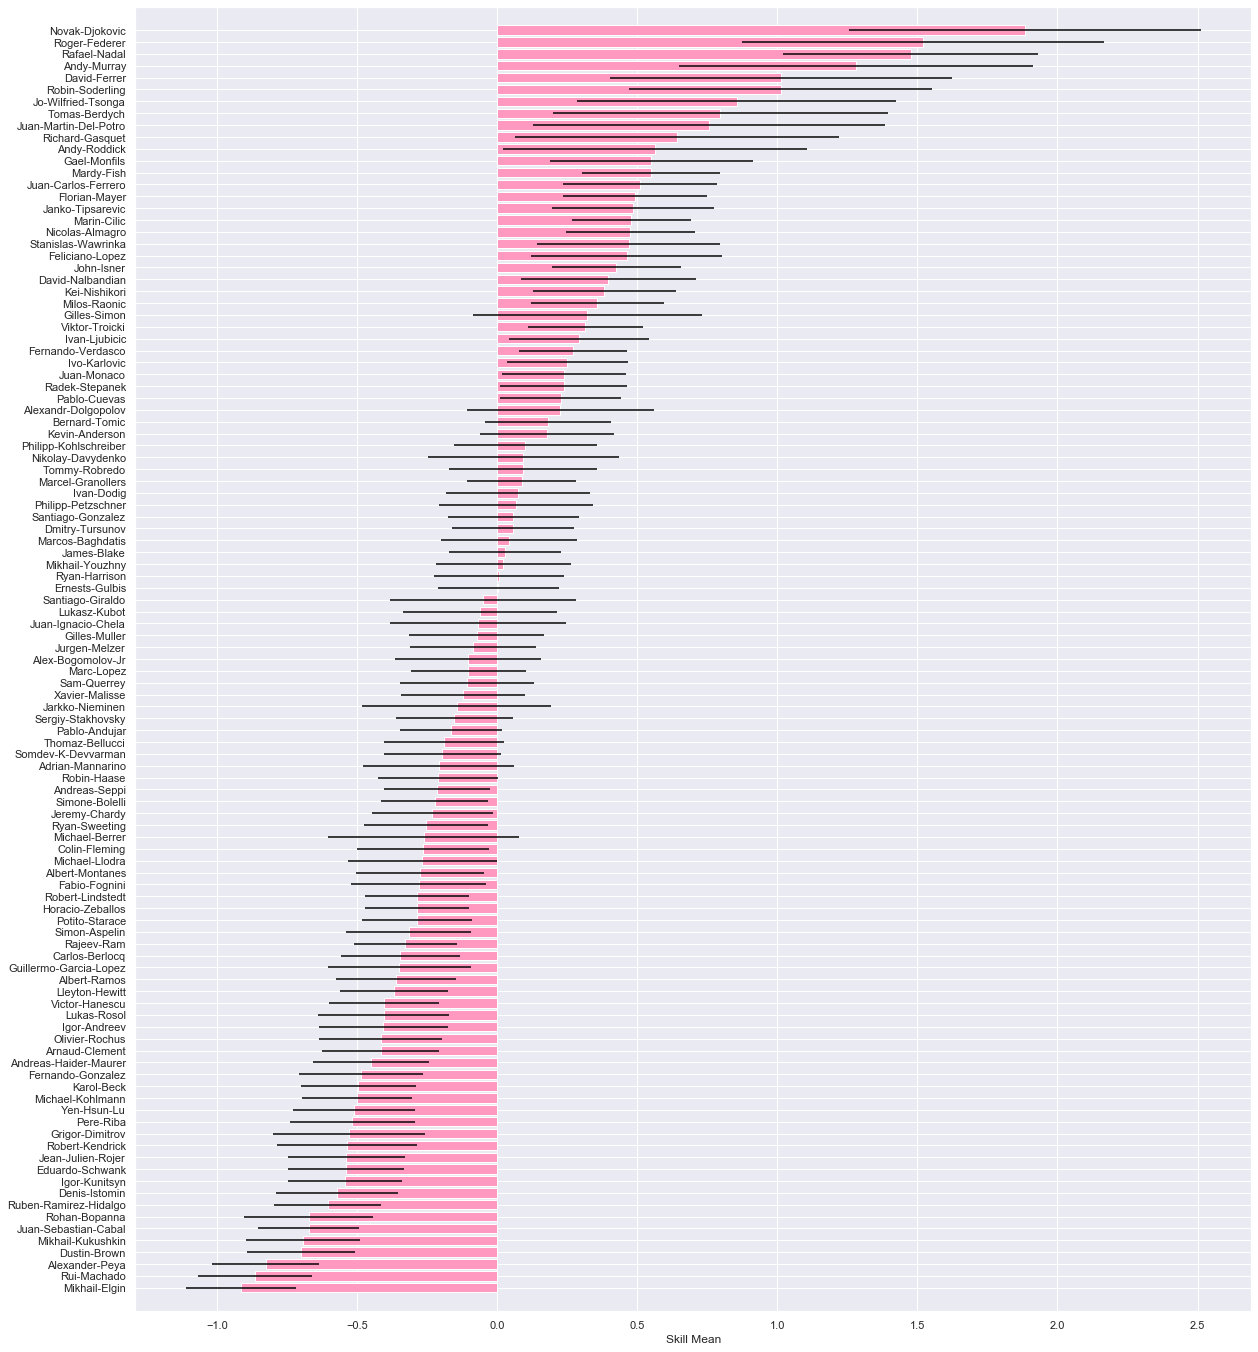

In [55]:
fig = sorted_barplot(skill_mean_gibbs, W, err=skill_std_gibbs)
fig.savefig('plots/gibbs-skill-ranking.eps', format='eps', dpi=200, bbox_inches='tight')

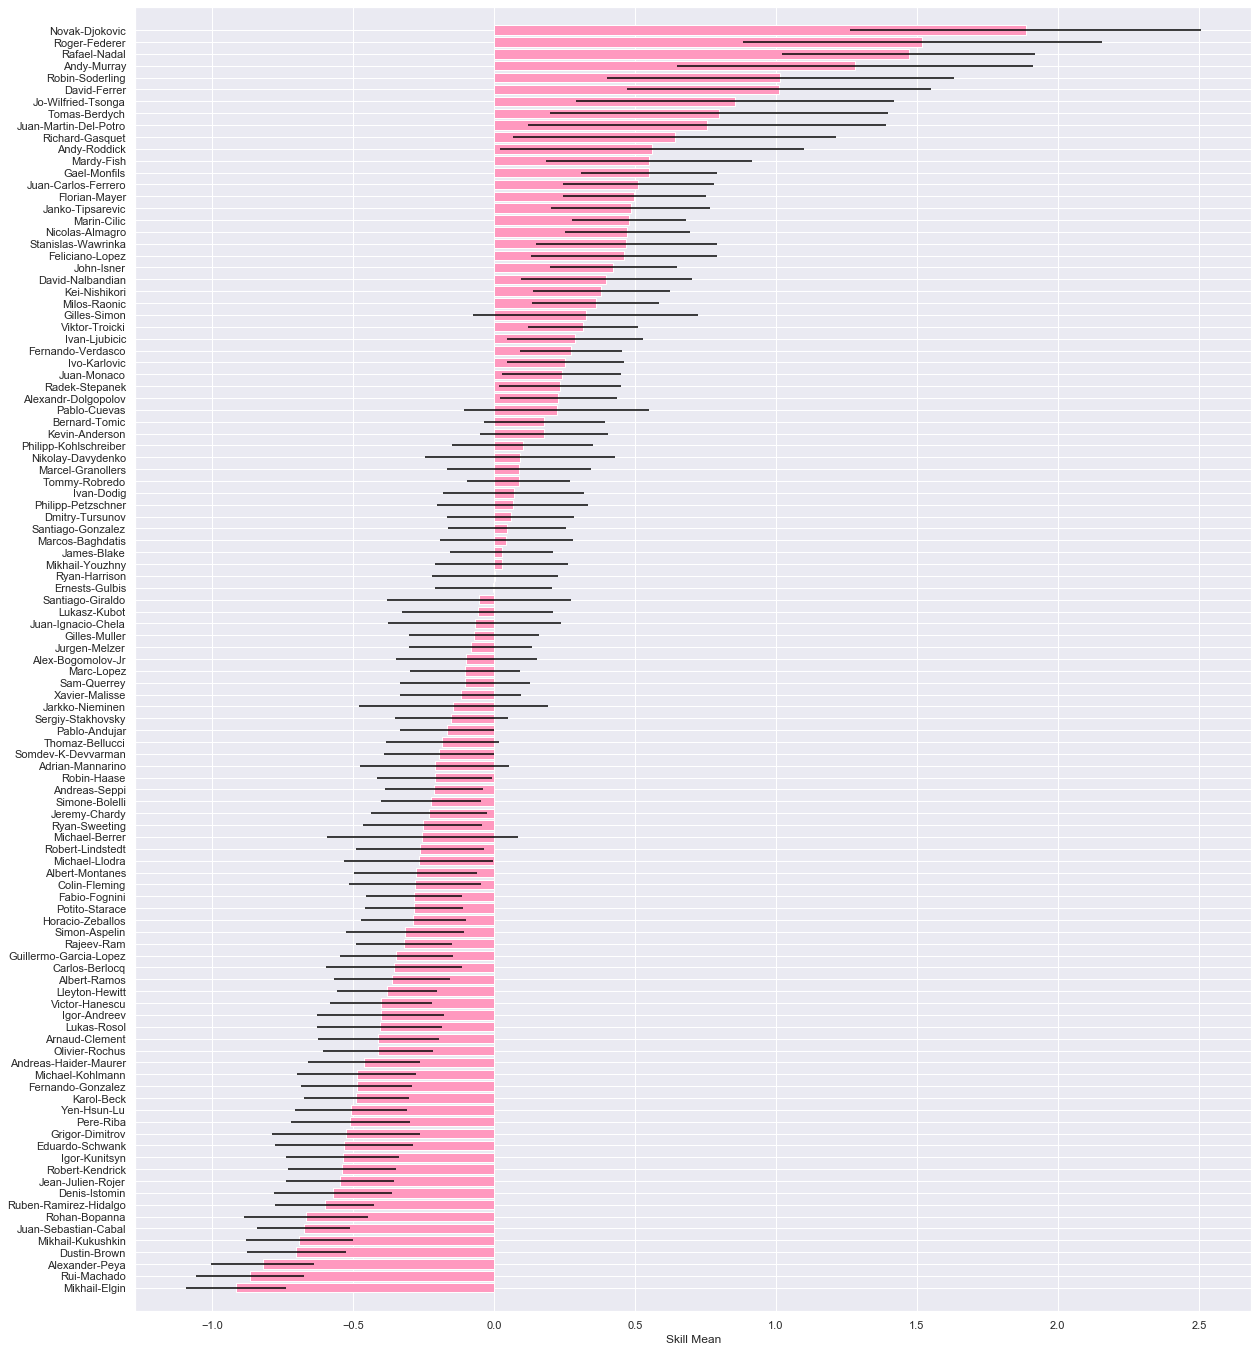

In [56]:
fig = sorted_barplot(skill_mean_mp, W, err=skill_std_mp)
fig.savefig('plots/mp-skill-ranking.eps', format='eps', dpi=200, bbox_inches='tight')

#### Plot different rankings against each other

In [57]:
rankings_df = pd.DataFrame({'Gibbs Sampling Skill Mean': skill_mean_gibbs,
                            'Message Passing Skill Mean': skill_mean_mp,
                           'Empirical Outcome Average': frac_games_won})

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

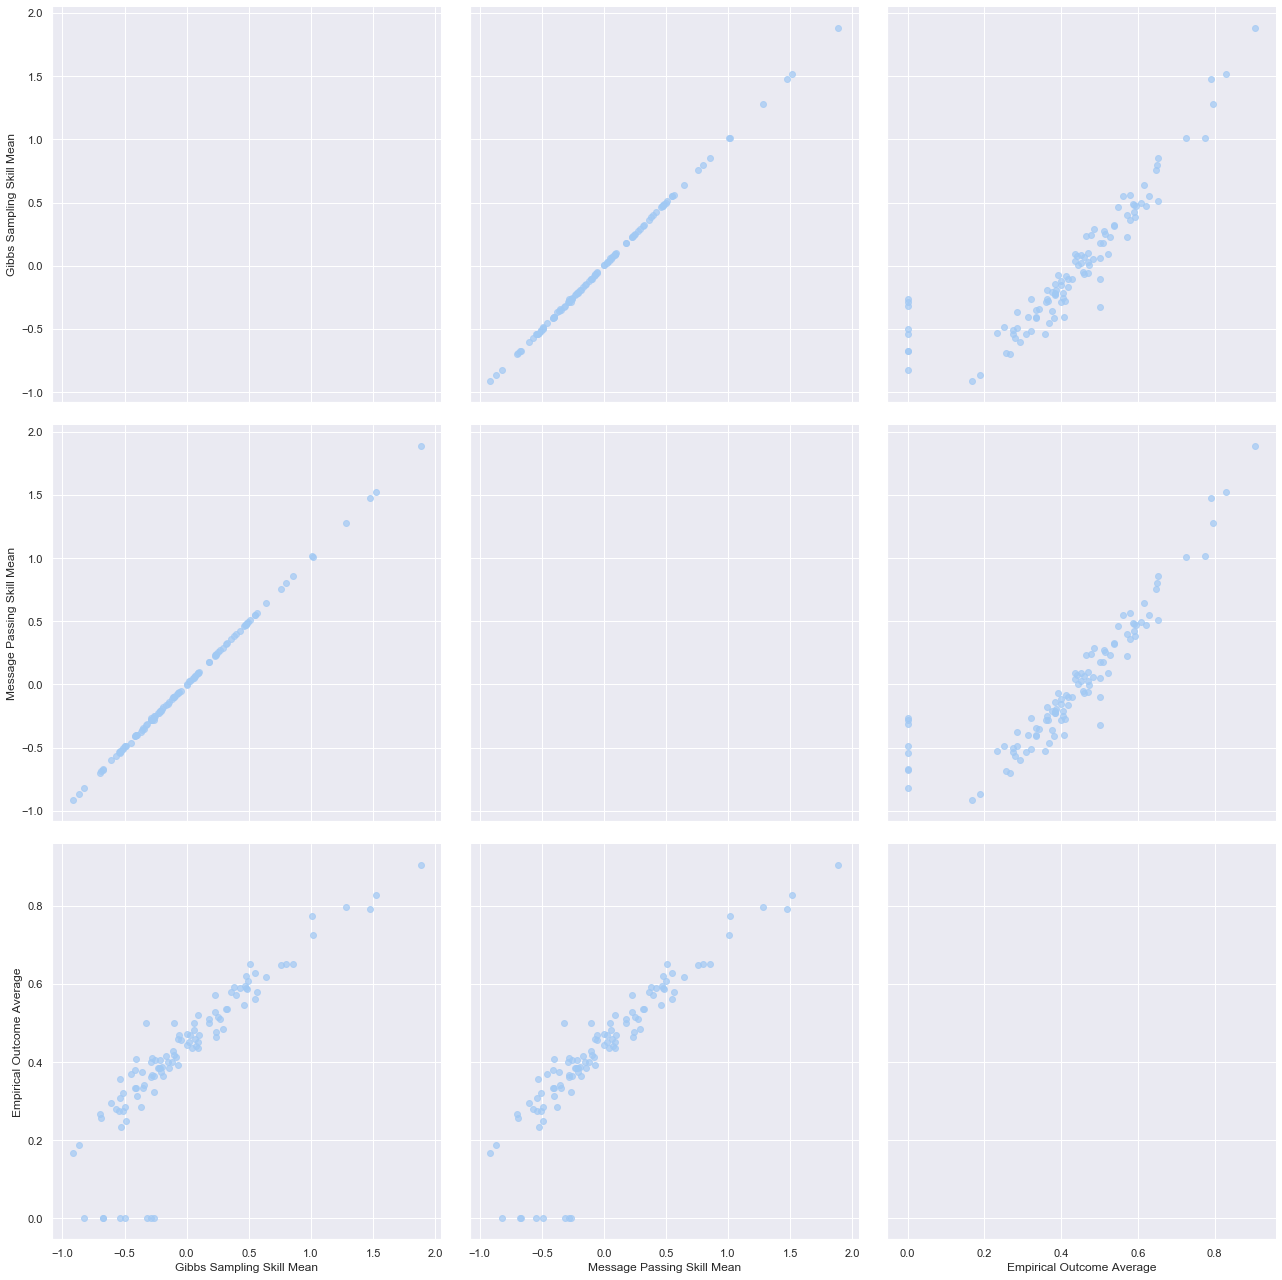

In [58]:
with sns.axes_style("darkgrid"):
    g = sns.PairGrid(rankings_df, palette='pastel', height=6)
#     g.map_diag(plt.hist, bins=20)
    g.map_offdiag(plt.scatter, alpha=0.7);
plt.savefig('plots/ranking-joint-plot.eps', format='eps', dpi=200, bbox_inches='tight')

#### Expected outcome averages comp.

In [60]:
rankings_df = pd.DataFrame({'Gibbs Sampling Expected Outcome': avg_prob_win_gibbs,
                            'Message Passing Expected Outcome': avg_prob_win_mp,
                           'Empirical Outcome Average': frac_games_won})

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

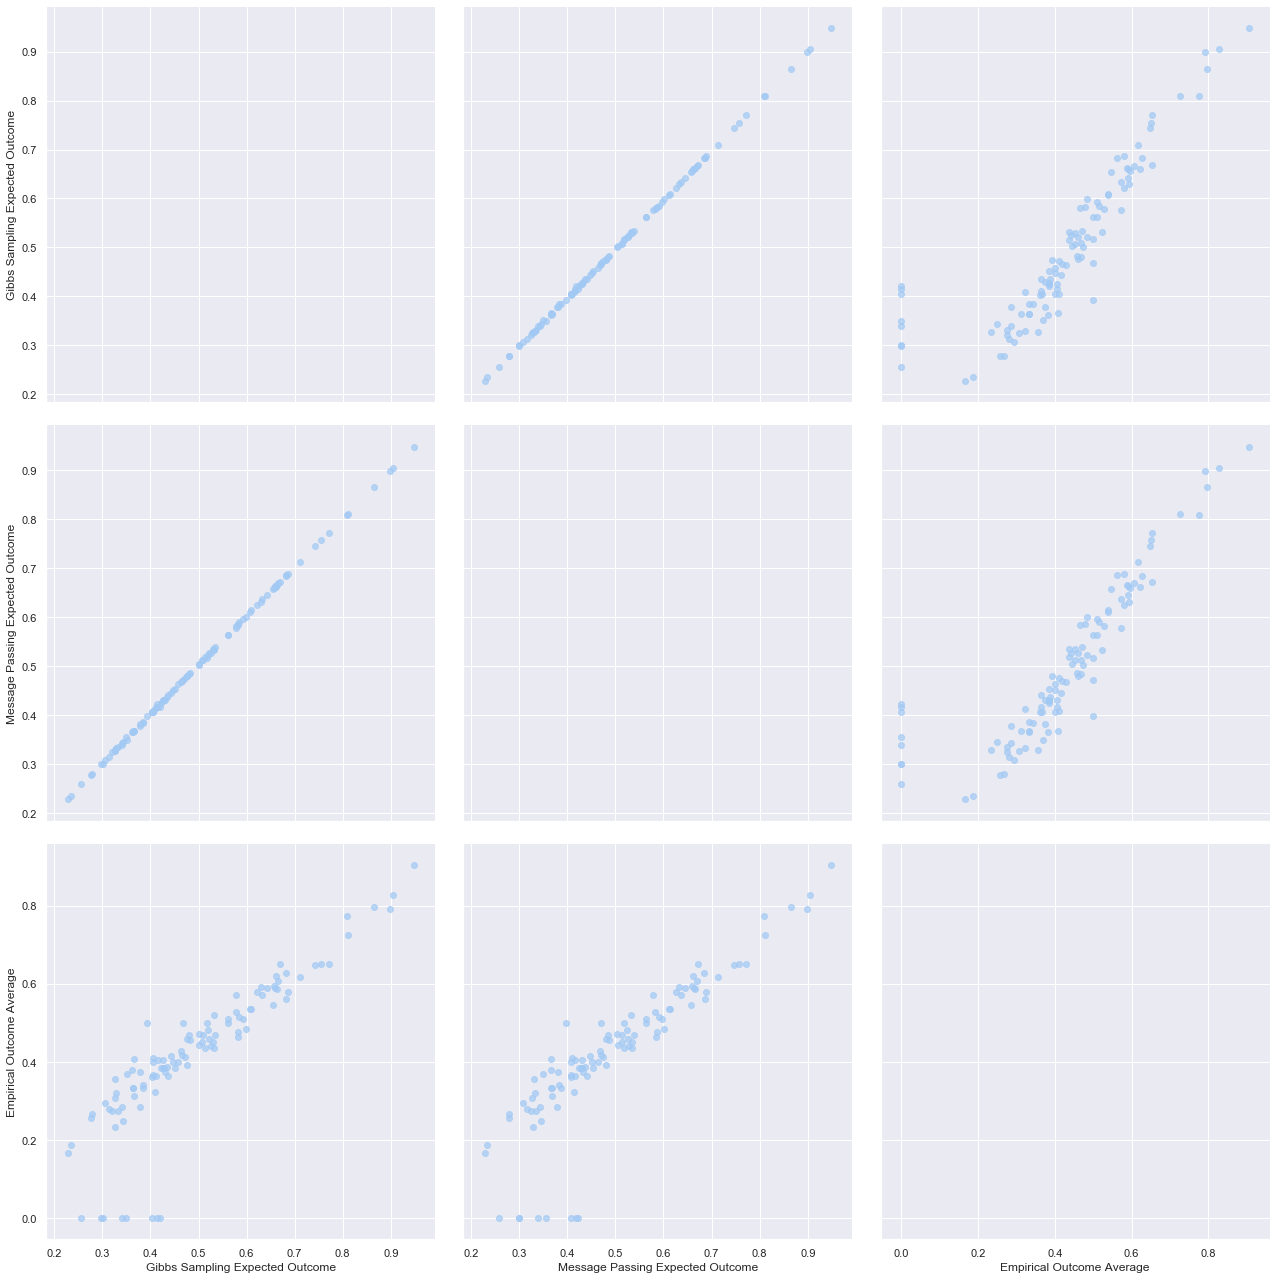

In [61]:
with sns.axes_style("darkgrid"):
    g = sns.PairGrid(rankings_df, palette='pastel', height=6)
#     g.map_diag(plt.hist, bins=20)
    g.map_offdiag(plt.scatter, alpha=0.7);
plt.savefig('plots/outcome-ranking-joint-plot.eps', format='eps', dpi=200, bbox_inches='tight')

##### Compare rankings using MP and Gibbs

In [62]:
sorted_indices_mp = np.argsort(skill_mean_mp)
sorted_indices_mp_outcome = np.argsort(avg_prob_win_mp)
sorted_indices_gibbs = np.argsort(skill_mean_gibbs)
for i in range(num_players):
    print(f'{sorted_indices_mp[i]}\t {sorted_indices_mp_outcome[i]}\t {sorted_indices_mp_outcome[i]==sorted_indices_mp[i]}')

104	 104	 True
74	 74	 True
96	 96	 True
88	 51	 False
51	 88	 False
97	 97	 True
101	 101	 True
85	 85	 True
66	 66	 True
106	 67	 False
87	 87	 True
67	 53	 False
58	 58	 True
53	 84	 False
84	 80	 False
80	 106	 False
38	 38	 True
82	 82	 True
102	 91	 False
91	 102	 False
36	 36	 True
93	 93	 True
94	 94	 True
77	 77	 True
55	 55	 True
70	 70	 True
72	 72	 True
50	 50	 True
6	 6	 True
95	 95	 True
103	 43	 False
56	 73	 False
73	 103	 False
43	 56	 False
98	 90	 False
90	 27	 False
27	 83	 False
105	 18	 False
83	 98	 False
18	 105	 False
92	 92	 True
49	 49	 True
48	 48	 True
59	 59	 True
60	 60	 True
34	 34	 True
89	 89	 True
21	 21	 True
54	 54	 True
30	 30	 True
75	 75	 True
63	 63	 True
100	 81	 False
81	 100	 False
76	 76	 True
13	 13	 True
78	 78	 True
86	 86	 True
9	 9	 True
39	 39	 True
71	 71	 True
52	 52	 True
65	 65	 True
26	 99	 False
99	 26	 False
61	 61	 True
64	 64	 True
17	 17	 True
69	 69	 True
45	 45	 True
40	 40	 True
68	 68	 True
62	 62	 True
37	 37	 True
57	 5